Import Libraries 

In [ ]:
import numpy as np ##numeric calculation
import matplotlib.pyplot as plt ##for plotting of bar graph
import pandas as pd  ##maage the dataset 


Read Dataset &n Split The dataset 




In [ ]:
dataset=pd.read_csv('/content/Salary_Data.csv')
x=dataset.iloc[:,:-1].values  ##selecting rows 
y=dataset.iloc[:,1].values  ##selecting columns 

In [ ]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x  ##original values

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y    

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

Split The dataset into Train And Test 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(22, 1)
(8, 1)
(22,)
(8,)


Train the Model 

In [ ]:
##machine has more accuracy if train size is greater than tests size 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

<function matplotlib.pyplot.show>

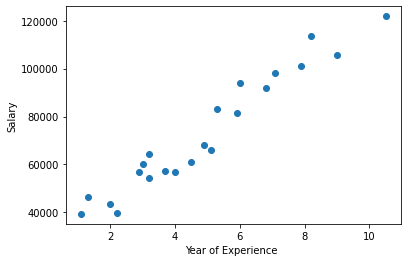

In [ ]:
##show the value in the graph
import matplotlib.pyplot as plt 
plt.scatter(x_train,y_train) 
plt.xlabel("Year of Experience ")
plt.ylabel("Salary")
plt.show

<function matplotlib.pyplot.show>

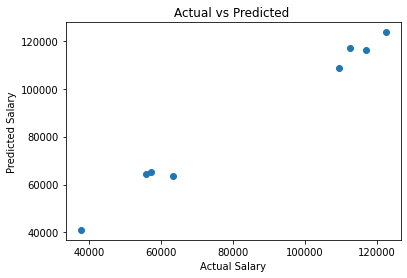

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred) 
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary") 
plt.title("Actual vs Predicted ")
plt.show

In [ ]:
diff=pd.DataFrame({'Actual Values ': y_test,'Predicted Values  ': y_pred,'Difference ': y_test-y_pred})
diff

,Actual Values,Predicted Values,Difference
0,37731.0,41056.257055,-3325.257055
1,122391.0,123597.709384,-1206.709384
2,57081.0,65443.504334,-8362.504334
3,63218.0,63567.562235,-349.562235
4,116969.0,116093.940990,875.059010
5,109431.0,108590.172597,840.827403
6,112635.0,117031.912039,-4396.912039
7,55794.0,64505.533285,-8711.533285


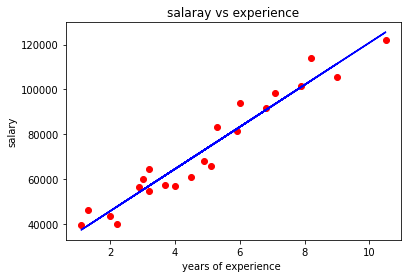

In [ ]:
plt.scatter(x_train,y_train,color='red') ##original value 
plt.plot(x_train,regressor.predict(x_train),color="blue")  ## predicted value  of x 
plt.title('salaray vs experience') 
plt.xlabel("years of experience ")
plt.ylabel("salary")
plt.show()

In [ ]:
print(regressor.coef_)  ## gives weight 

[9379.71049195]


In [ ]:
print(regressor.intercept_) ##gives intercept 

26986.691316737248


In [ ]:
### implement mean square error 
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
print("Mean Squared Error ",mean_squared_error(y_test,y_pred)) ##denotes the estimated of average square values of original value and true values
print("Score",r2_score(y_test,y_pred))

Mean Squared Error  22407940.143340684
Score 0.9779208335417602


Applying Multilinaer Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

In [ ]:
poly=PolynomialFeatures(degree=10)

In [ ]:
new_x=poly.fit_transform(x)

In [ ]:
model2=LinearRegression()
model2.fit(new_x,y)


LinearRegression()

In [ ]:
y_pred=model2.predict(new_x)

In [ ]:
y_pred

array([ 40265.20705425,  43130.42150343,  40799.54224055,  39973.3605679 ,
        43394.4050445 ,  57099.39576432,  58142.1880902 ,  59315.45873207,
        59315.45873207,  58764.69976005,  58311.99078208,  58255.27010757,
        58255.27010757,  58368.68331513,  61023.97690507,  67279.42771116,
        71350.87485084,  75672.15765074,  87265.9239679 ,  88726.42938536,
        95307.36767715,  96782.44940609, 103664.25987762, 107040.93709511,
       110938.82993072, 111516.9819693 , 112054.32076401, 112746.1486792 ,
       124539.11577362, 120789.44662994])

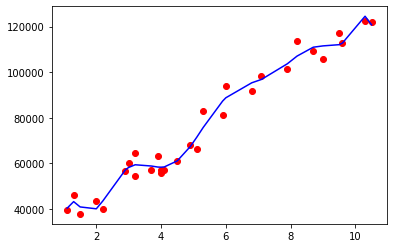

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.show()